In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np

train = pd.read_csv('./Data/train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('./Data/test_Y3wMUE5_7gLdaTN.csv')                    

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


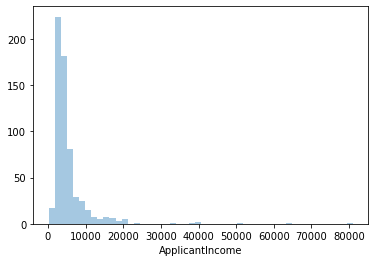

In [6]:
sns.distplot(train.ApplicantIncome, kde=False)

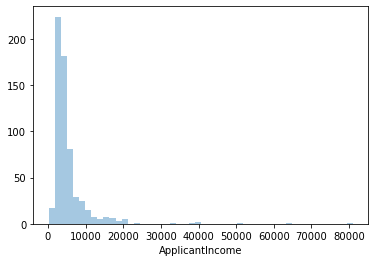

In [7]:
sns.distplot(train.ApplicantIncome.dropna(), kde= False)

###### Checking that by plotting the education level against the income

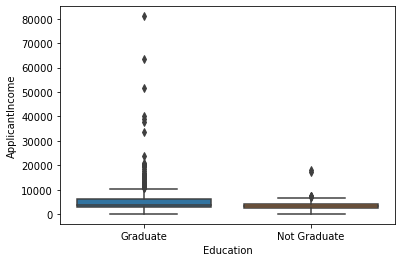

In [8]:
sns.boxplot(x='Education', y='ApplicantIncome', data= train)

###### Turn Loan status into binary

In [9]:
modified = train
modified['Loan_Status'] = train['Loan_Status'].apply(lambda x: 0 if x=="N" else 1)
# calculate the mean

modified.groupby('Credit_History').mean()['Loan_Status']

Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64

###### Deal with Missing value

In [10]:
train.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#categorical
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
#numerical
train['LoanAmount'].fillna(train['LoanAmount'].mean(), inplace=True)

In [19]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['TotalIncome_log'] = np.log(train['TotalIncome'])


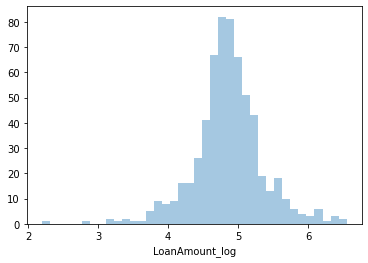

In [20]:
sns.distplot(train['LoanAmount_log'], kde= False)

### Modelling

In [22]:
from sklearn.preprocessing import LabelEncoder
category = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
encoder = LabelEncoder()
for i in category:
    train[i] = encoder.fit_transform(train[i])
    
train.dtypes    

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
totalIncome          float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

##### Now all our variables have became numbers that our models can understand

In [54]:
#Import the models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold model selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [55]:
def classification_model(model, data, predictors, outcomes):
    #Fit the model:
    model.fit(data[predictors], data[outcomes])
    
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
    
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions, data[outcomes])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
#Perform k-fold model_selection with 5 folds
    kf = KFold(data.shape[0], n_splits == 5)
    error = []
    
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
    #Record error from each model_selection run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    print ("Model-Selection Score : %s" % "{0:.3%}".format(np.mean(error)))


## Now test diffrent models

# Logistic Regression

In [56]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 80.945%


NameError: name 'n_splits' is not defined

# Decision Tree

In [57]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 80.945%


NameError: name 'n_splits' is not defined

In [58]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, train, predictor_var, outcome_var)

Accuracy : 100.000%


NameError: name 'n_splits' is not defined